Notebook for creating the boxplots of all experiments for the bimodal case
Change the directory, the range_1, directory1, directory1_new according to your paths

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn import metrics

In [2]:
seed = 49857
np.random.seed(seed)

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory

'/data/user/boiger_r/aerosol'

In [4]:
#range_1 = ['1','4']
range_1 = ['1','4','5','6_secondversion','7_secondversion','8_secondversion','9','10','11','12','13','14_secondversion','15_secondversion','16','17','18_secondversion','19','20_secondversion','21_secondversion','22','23','24_secondversion']


In [5]:
df_P11 = []
df_P12 = []
df_P11_rel = []
df_FMF = []
df_Rfine = []
df_Rcoarse = []
df_GSD_fine = []
df_GSD_coarse = []
df_n_fine = []
df_n_coarse = []
df_k_450_fine = []
df_k_450_coarse = []
df_k_532_fine = []
df_k_532_coarse = []
df_k_630_fine = []
df_k_630_coarse = []
df_V = []
df_sph = []
df_AAE_fine = []
df_AAE_coarse = []

In [6]:
def change_dvar(dvar_test,dvar_pred,number):
    testnr = 1
    if '24' in number:
        dvar_test['k_630nm_fine'] = dvar_test['k_450nm_fine']*(630/450)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_450nm_fine']*(630/450)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_450nm_coarse']*(630/450)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_450nm_coarse']*(630/450)**(1-dvar_pred_iv['AAE_coarse'])
    elif '23' in number:
        dvar_test['k_630nm_fine'] = dvar_test['k_fine_532']*(630/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_fine_532']*(630/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_coarse_532']*(630/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_coarse_532']*(630/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '22' in number:
        dvar_test['k_450nm_fine'] = dvar_test['k_fine_532']*(450/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_450nm_fine'] = dvar_pred_iv['k_fine_532']*(450/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_450nm_coarse'] = dvar_test['k_coarse_532']*(450/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_450nm_coarse'] = dvar_pred_iv['k_coarse_532']*(450/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '21' in number:
        testnr = testnr+1
    elif '20' in number:
        testnr = testnr+1
    elif '19' in number:
        testnr = testnr+1
    elif '18' in number:
        dvar_test['k_630nm_fine'] = dvar_test['k_450nm_fine']*(630/450)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_450nm_fine']*(630/450)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_450nm_coarse']*(630/450)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_450nm_coarse']*(630/450)**(1-dvar_pred_iv['AAE_coarse'])
    elif '17' in number:
        dvar_test['k_630nm_fine'] = dvar_test['k_fine_532']*(630/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_fine_532']*(630/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_coarse_532']*(630/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_coarse_532']*(630/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '16' in number:
        dvar_test['k_450nm_fine'] = dvar_test['k_fine_532']*(450/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_450nm_fine'] = dvar_pred_iv['k_fine_532']*(450/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_450nm_coarse'] = dvar_test['k_coarse_532']*(450/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_450nm_coarse'] = dvar_pred_iv['k_coarse_532']*(450/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '15' in number:
        testnr = testnr+1
    elif '14' in number:
        testnr = testnr+1
    elif '13' in number:    
        testnr = testnr+1    
    elif '12' in number :
        dvar_test['k_450nm_fine'] = dvar_test['k_fine_532']*(450/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_450nm_fine'] = dvar_pred_iv['k_fine_532']*(450/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_450nm_coarse'] = dvar_test['k_coarse_532']*(450/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_450nm_coarse'] = dvar_pred_iv['k_coarse_532']*(450/532)**(1-dvar_pred_iv['AAE_coarse'])
        dvar_test['k_630nm_fine'] = dvar_test['k_fine_532']*(630/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_fine_532']*(630/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_coarse_532']*(630/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_coarse_532']*(630/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '11' in number:
        dvar_test['k_450nm_fine'] = dvar_test['k_fine_532']*(450/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_450nm_fine'] = dvar_pred_iv['k_fine_532']*(450/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_450nm_coarse'] = dvar_test['k_coarse_532']*(450/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_450nm_coarse'] = dvar_pred_iv['k_coarse_532']*(450/532)**(1-dvar_pred_iv['AAE_coarse'])
        dvar_test['k_630nm_fine'] = dvar_test['k_fine_532']*(630/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_fine_532']*(630/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_coarse_532']*(630/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_coarse_532']*(630/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '10' in number:
        dvar_test['k_630nm_fine'] = dvar_test['k_fine_532']*(630/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_fine_532']*(630/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_coarse_532']*(630/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_coarse_532']*(630/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '9' in number:
        dvar_test['k_450nm_fine'] = dvar_test['k_fine_532']*(450/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_450nm_fine'] = dvar_pred_iv['k_fine_532']*(450/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_450nm_coarse'] = dvar_test['k_coarse_532']*(450/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_450nm_coarse'] = dvar_pred_iv['k_coarse_532']*(450/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '8' in number:
        dvar_test['k_630nm_fine'] = dvar_test['k_450nm_fine']*(630/450)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_450nm_fine']*(630/450)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_450nm_coarse']*(630/450)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_450nm_coarse']*(630/450)**(1-dvar_pred_iv['AAE_coarse'])
    elif '7' in number:
        testnr = testnr+1
    elif '6' in number:
        testnr = testnr+1
    elif '5' in number:
        testnr = testnr+1
    elif '4' in number:
        dvar_test['k_450nm_fine'] = dvar_test['k_fine_532']*(450/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_450nm_fine'] = dvar_pred_iv['k_fine_532']*(450/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_450nm_coarse'] = dvar_test['k_coarse_532']*(450/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_450nm_coarse'] = dvar_pred_iv['k_coarse_532']*(450/532)**(1-dvar_pred_iv['AAE_coarse'])
        dvar_test['k_630nm_fine'] = dvar_test['k_fine_532']*(630/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_fine_532']*(630/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_coarse_532']*(630/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_coarse_532']*(630/532)**(1-dvar_pred_iv['AAE_coarse'])
    elif '1' in number:
        dvar_test['k_450nm_fine'] = dvar_test['k_fine_532']*(450/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_450nm_fine'] = dvar_pred_iv['k_fine_532']*(450/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_450nm_coarse'] = dvar_test['k_coarse_532']*(450/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_450nm_coarse'] = dvar_pred_iv['k_coarse_532']*(450/532)**(1-dvar_pred_iv['AAE_coarse'])
        dvar_test['k_630nm_fine'] = dvar_test['k_fine_532']*(630/532)**(1-dvar_test['AAE_fine'])
        dvar_pred_iv['k_630nm_fine'] = dvar_pred_iv['k_fine_532']*(630/532)**(1-dvar_pred_iv['AAE_fine'])
        dvar_test['k_630nm_coarse'] = dvar_test['k_coarse_532']*(630/532)**(1-dvar_test['AAE_coarse'])
        dvar_pred_iv['k_630nm_coarse'] = dvar_pred_iv['k_coarse_532']*(630/532)**(1-dvar_pred_iv['AAE_coarse'])

    return dvar_test, dvar_pred_iv


In [7]:
df_RMSE = []

In [8]:
for i in range_1:
    directory1 = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
    directory1 = directory1 + 'paper_results_gaussian_bim_AAE/version'+str(i)
    pred_datafile = directory1 +'/model/pred.hdf5'
    number = directory1.split('/',)[-1]

    print(directory1)
    
    plot_dir = directory1 + '/plots/model'
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    model_dir = directory1 +'/model'
    configs = pd.read_csv(f'{model_dir}/configs.csv')
    configs.columns
    test_datafile = configs['config/datafile'][0]
    test_datafile = test_datafile.replace('training','test')
    dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
    qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
    dvar_test.reset_index(drop=True, inplace=True)
    qoi_test.reset_index(drop=True, inplace=True)
    
    
    qoi_columns = qoi_test.columns
    dvar_columns = dvar_test.columns
        
        
    qoi_pred_fw = pd.read_hdf(pred_datafile, 'fw')
    qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
    dvar_pred_iv = pd.read_hdf(pred_datafile,'inv')
    dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)
    
    
    dvar_test, dvar_pred_iv = change_dvar(dvar_test,dvar_pred_iv,number)
    
    if i == '1':
        dvar_columns1 = dvar_test.columns
        for col in dvar_test.columns:
            RMSE = metrics.mean_squared_error(dvar_test[col],dvar_pred_iv[col],squared = False)
            print(col,RMSE)
            df_RMSE.append(RMSE)
    
    qoi_columns = qoi_test.columns
    dvar_columns = dvar_test.columns
    P11 = []
    P12 = []
    for name in qoi_columns:
        if 'P11' in name:
            P11.append(name)
        if 'P12' in name:
            P12.append(name)

    abs_error_fw = np.abs( (qoi_test) - (qoi_pred_fw))
    abs_error_fw_P11 = abs_error_fw[P11].mean(axis = 1)
    abs_error_fw_P12 = abs_error_fw[P12].mean(axis = 1)
    abs_error_iv = np.abs(dvar_test-dvar_pred_iv)
    
    print(abs_error_iv.median())
    
    rel_error_fw = np.abs( (np.exp(qoi_test) - np.exp(qoi_pred_fw)))/np.abs(np.exp(qoi_test))*100
    rel_error_fw_P11 = rel_error_fw[P11].mean(axis = 1)
    
    df_P11.append(abs_error_fw_P11)
    df_P12.append(abs_error_fw_P12)
    
    df_FMF.append(abs_error_iv['FMF'])
    df_Rfine.append(abs_error_iv['CMR_fine'])
    df_Rcoarse.append(abs_error_iv['CMR_coarse'])
    df_GSD_fine.append(abs_error_iv['GSD_fine'])
    df_GSD_coarse.append(abs_error_iv['GSD_coarse'])
    df_n_fine.append(abs_error_iv['n_fine'])
    df_n_coarse.append(abs_error_iv['n_coarse'])
    df_P11_rel.append(rel_error_fw_P11)
    if 'AAE_fine' in abs_error_iv.columns:
        df_AAE_fine.append(abs_error_iv['AAE_fine'])
        df_AAE_coarse.append(abs_error_iv['AAE_coarse'])
    
    if 'k_450nm_fine' in abs_error_iv.columns:
        df_k_450_fine.append(abs_error_iv['k_450nm_fine'])
        df_k_450_coarse.append(abs_error_iv['k_450nm_coarse'])
    if 'k_fine_532' in abs_error_iv.columns:        
        df_k_532_fine.append(abs_error_iv['k_fine_532'])
        df_k_532_coarse.append(abs_error_iv['k_coarse_532'])
    if 'k_630nm_fine' in abs_error_iv.columns:
        df_k_630_fine.append(abs_error_iv['k_630nm_fine'])
        df_k_630_coarse.append(abs_error_iv['k_630nm_coarse'])
    df_V.append(abs_error_iv['V_tot'])
    df_sph.append(abs_error_iv['sph_frac'])
    


/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/version1
V_tot 0.1522526069100128
FMF 0.0030005690544106195
CMR_fine 0.0002456528995641883
CMR_coarse 0.004344663890456839
GSD_fine 0.002363104029811599
GSD_coarse 0.0029065068721354495
sph_frac 0.007588697545785311
n_fine 0.0023141660969598463
n_coarse 0.0018457150317571084
k_fine_532 0.0018136031985248491
k_coarse_532 0.00037760958797361033
AAE_fine 0.2997992399612041
AAE_coarse 0.10941092034219704
k_450nm_fine 0.002653704675893271
k_450nm_coarse 0.00043366305005015926
k_630nm_fine 0.001808240532561129
k_630nm_coarse 0.00034621075742724674
V_tot             0.092467
FMF               0.001880
CMR_fine          0.000142
CMR_coarse        0.002292
GSD_fine          0.001512
GSD_coarse        0.001642
sph_frac          0.004409
n_fine            0.001549
n_coarse          0.000853
k_fine_532        0.001028
k_coarse_532      0.000194
AAE_fine          0.065139
AAE_coarse        0.039825

V_tot             0.209791
FMF               0.004269
CMR_fine          0.000358
CMR_coarse        0.005667
GSD_fine          0.003099
GSD_coarse        0.004860
sph_frac          0.013263
n_fine            0.003069
n_coarse          0.001714
k_450nm_coarse    0.000380
k_450nm_fine      0.004208
AAE_fine          0.220342
AAE_coarse        0.124175
k_630nm_fine      0.003437
k_630nm_coarse    0.000400
dtype: float64
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/version19
V_tot           3.680971
FMF             0.004870
CMR_fine        0.001011
CMR_coarse      0.006882
GSD_fine        0.004367
GSD_coarse      0.004338
sph_frac        0.011530
n_fine          0.004437
n_coarse        0.002210
k_fine_532      0.002276
k_coarse_532    0.000659
dtype: float64
/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/version20_secondversion
V_tot             3.680817
FMF               0.00605

In [10]:
df_RMSE=np.array(df_RMSE)

In [11]:
df_RMSE1 = pd.DataFrame(df_RMSE)

In [12]:
dvar_columns = dvar_columns1
dvar_columns = list(dvar_columns)
dvar_columns

df_index = list(df_RMSE1.index)

In [13]:
df_RMSE1 = df_RMSE1.transpose()

In [14]:
zip_iterator = zip(df_index,dvar_columns)
a_dictionary = dict(zip_iterator)
a_dictionary

{0: 'V_tot',
 1: 'FMF',
 2: 'CMR_fine',
 3: 'CMR_coarse',
 4: 'GSD_fine',
 5: 'GSD_coarse',
 6: 'sph_frac',
 7: 'n_fine',
 8: 'n_coarse',
 9: 'k_fine_532',
 10: 'k_coarse_532',
 11: 'AAE_fine',
 12: 'AAE_coarse',
 13: 'k_450nm_fine',
 14: 'k_450nm_coarse',
 15: 'k_630nm_fine',
 16: 'k_630nm_coarse'}

In [15]:
df_RMSE1 = df_RMSE1.rename(a_dictionary,axis =1)

In [16]:
dvar_test.describe()

V_tot           FMF      CMR_fine    CMR_coarse      GSD_fine  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      16.635096      0.729554      0.144554      1.085005      1.474780   
std        4.239037      0.115521      0.010735      0.124044      0.055215   
min        9.300347      0.530029      0.126002      0.870005      1.380006   
25%       12.937745      0.629053      0.135237      0.977317      1.426195   
50%       16.650658      0.728802      0.144545      1.084572      1.474913   
75%       20.315099      0.829788      0.153893      1.192971      1.522855   
max       23.998158      0.929993      0.163000      1.300000      1.569995   

         GSD_coarse      sph_frac        n_fine      n_coarse  k_450nm_coarse  \
count  20000.000000  20000.000000  20000.000000  20000.000000    20000.000000   
mean       1.445068      0.509870      1.464477      1.524889        0.010027   
std        0.026042      0.196183      0.078214      0.043264        0.005757   
min        1.400000      0.170003      1.330003      1.450007        0.000010   
25%        1.422366      0.338853      1.396455      1.487415        0.005055   
50%        1.445446      0.509943      1.464372      1.525143        0.009956   
75%        1.467576      0.681712      1.532542      1.562128        0.015043   
max        1.489991      0.849939      1.599982      1.600000        0.019999   

       k_450nm_fine      AAE_fine    AAE_coarse  k_630nm_fine  k_630nm_coarse  
count  20000.000000  20000.000000  20000.000000  20000.000000    20000.000000  
mean       0.099978      4.012450      1.947780      0.043200        0.007318  
std        0.057811      1.778835      0.259915      0.038210        0.004271  
min        0.000011      1.000000      1.500007      0.000002        0.000007  
25%        0.049841      3.000000      1.722132      0.015119        0.003663  
50%        0.099543      4.000000      1.945167      0.031656        0.007196  
75%        0.150302      6.000000      2.171836      0.061018        0.010897  
max        0.199972      7.000000      2.399993      0.199955        0.016755

In [17]:
metrics.mean_squared_error(qoi_test, qoi_pred_fw, squared = False)

0.002148181965377997

In [18]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
metrics.mean_squared_error(y_true, y_pred)

0.7083333333333334

In [19]:
np.min(qoi_test.min())*0.05

-0.017737

In [20]:
np.mean(qoi_test.mean())*0.05

0.011662007853934099

In [21]:
np.max(qoi_test.max())*0.05

0.045252

In [22]:
P11_nr = ['1','4','5','6_secondversion','7_secondversion','8_secondversion','9','10','11','13','14_secondversion','15_secondversion','16','17','18_secondversion']

P12_nr = ['1','4','5','6_secondversion','7_secondversion','8_secondversion','9','10','12','19','20_secondversion','21_secondversion','22','23','24_secondversion']


In [23]:
range_450 = ['1','4','6_secondversion','8_secondversion','9','11','12','14_secondversion','16','18_secondversion','20_secondversion','22','24_secondversion']
range_532 = ['1','4','5','9','10','11','12','13','16','17','19','22','23']
range_630 = ['1','4','7_secondversion','8_secondversion','10','11','12','15_secondversion','17','18_secondversion','21_secondversion','23','24_secondversion']
range_AAE = ['1','4','8_secondversion','9','10','11','12','16','17','18_secondversion','22','23','24_secondversion']


In [24]:
df_P11= pd.DataFrame(df_P11,index = range_1).T
df_P12 = pd.DataFrame(df_P12,index = range_1).T

df_P11_rel = pd.DataFrame(df_P11_rel,index = range_1).T


df_FMF = pd.DataFrame(df_FMF,index = range_1).T
df_Rfine = pd.DataFrame(df_Rfine,index = range_1).T
df_Rcoarse = pd.DataFrame(df_Rcoarse,index = range_1).T
df_GSD_fine = pd.DataFrame(df_GSD_fine,index = range_1).T
df_GSD_coarse = pd.DataFrame(df_GSD_coarse,index = range_1).T
df_n_fine = pd.DataFrame(df_n_fine,index = range_1).T
df_n_coarse = pd.DataFrame(df_n_coarse,index = range_1).T

df_k_450_fine = pd.DataFrame(df_k_450_fine,index = range_450).T
df_k_450_coarse = pd.DataFrame(df_k_450_coarse,index = range_450).T
df_k_532_fine = pd.DataFrame(df_k_532_fine,index = range_532).T
df_k_532_coarse = pd.DataFrame(df_k_532_coarse,index = range_532).T
df_AAE_coarse = pd.DataFrame(df_AAE_coarse,index = range_AAE).T



In [25]:
df_AAE_fine = pd.DataFrame(df_AAE_fine,index =range_AAE).T
df_k_630_fine = pd.DataFrame(df_k_630_fine,index = range_630).T
df_k_630_coarse = pd.DataFrame(df_k_630_coarse,index = range_630).T
df_V = pd.DataFrame(df_V,index = range_1).T
df_sph = pd.DataFrame(df_sph,index = range_1).T

In [26]:
df_P11_rel[P11_nr].describe(percentiles = [0.95])

1             4             5  6_secondversion  \
count  20000.000000  20000.000000  20000.000000     20000.000000   
mean       1.343912      1.231332      0.985216         1.079450   
std        0.329999      0.317797      0.336078         0.342554   
min        0.721955      0.628219      0.422724         0.515097   
50%        1.279495      1.170477      0.908591         1.005651   
95%        1.970647      1.833599      1.618365         1.727835   
max        5.361730      5.388191      5.916822         4.798424   

       7_secondversion  8_secondversion             9            10  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          0.938800         1.331156      1.337477      1.173560   
std           0.355024         0.346461      0.421620      0.313996   
min           0.380369         0.730414      0.656546      0.597059   
50%           0.850346         1.261053      1.261457      1.108581   
95%           1.611592         1.980002      2.040678      1.773929   
max           6.550462         5.671561     29.902859      3.827666   

                 11            13  14_secondversion  15_secondversion  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean       0.887623      0.762047          0.760300          0.741685   
std        0.260911      0.338320          0.343526          0.319597   
min        0.419379      0.279978          0.299236          0.291147   
50%        0.833669      0.681536          0.700481          0.650247   
95%        1.380445      1.387825          1.255828          1.382453   
max        3.143822     15.125093         30.687671          3.415218   

                 16            17  18_secondversion  
count  20000.000000  20000.000000      20000.000000  
mean       0.855280      0.703104          0.884836  
std        0.301505      0.222406          0.260783  
min        0.360091      0.323077          0.422520  
50%        0.784996      0.655811          0.833152  
95%        1.440063      1.108527          1.367930  
max        4.709486      3.574474          3.691786

In [27]:
df_P12[P12_nr].describe(percentiles = [0.95])

1             4             5  6_secondversion  \
count  20000.000000  20000.000000  20000.000000     20000.000000   
mean       0.002172      0.002084      0.001917         0.002041   
std        0.000679      0.000694      0.000910         0.000822   
min        0.001060      0.000909      0.000645         0.000761   
50%        0.002020      0.001926      0.001664         0.001833   
95%        0.003485      0.003425      0.003733         0.003627   
max        0.008702      0.009583      0.009896         0.009020   

       7_secondversion  8_secondversion             9            10  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          0.001422         0.002179      0.002370      0.002415   
std           0.000558         0.000698      0.000849      0.001196   
min           0.000550         0.000933      0.001023      0.000957   
50%           0.001285         0.002023      0.002162      0.002041   
95%           0.002498         0.003524      0.004021      0.004889   
max           0.009960         0.018452      0.018250      0.012174   

                 12            19  20_secondversion  21_secondversion  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean       0.001584      0.001536          0.001496          0.001337   
std        0.000552      0.000783          0.000666          0.000730   
min        0.000678      0.000458          0.000562          0.000471   
50%        0.001478      0.001314          0.001327          0.001168   
95%        0.002582      0.003108          0.002703          0.002557   
max        0.010795      0.008164          0.021438          0.040357   

                 22            23  24_secondversion  
count  20000.000000  20000.000000      20000.000000  
mean       0.001624      0.001578          0.001644  
std        0.000685      0.000868          0.000573  
min        0.000643      0.000520          0.000702  
50%        0.001453      0.001308          0.001514  
95%        0.002949      0.003411          0.002736  
max        0.009936      0.010202          0.006704

In [28]:
df_P11[P11_nr].describe(percentiles = [0.95])

1             4             5  6_secondversion  \
count  20000.000000  20000.000000  20000.000000     20000.000000   
mean       0.013471      0.012270      0.009850         0.010822   
std        0.003326      0.003152      0.003350         0.003454   
min        0.007229      0.006276      0.004222         0.005152   
50%        0.012824      0.011670      0.009081         0.010070   
95%        0.019796      0.018237      0.016143         0.017360   
max        0.055323      0.055678      0.057333         0.049321   

       7_secondversion  8_secondversion             9            10  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          0.009397         0.013271      0.013381      0.011746   
std           0.003552         0.003428      0.004075      0.003141   
min           0.003806         0.007290      0.006580      0.005973   
50%           0.008509         0.012581      0.012625      0.011096   
95%           0.016137         0.019686      0.020379      0.017770   
max           0.063318         0.057297      0.255595      0.038680   

                 11            13  14_secondversion  15_secondversion  \
count  20000.000000  20000.000000      20000.000000      20000.000000   
mean       0.008887      0.007635          0.007588          0.007395   
std        0.002621      0.003386          0.003189          0.003160   
min        0.004195      0.002800          0.002990          0.002911   
50%        0.008346      0.006823          0.006994          0.006498   
95%        0.013827      0.013920          0.012494          0.013728   
max        0.032075      0.143198          0.246095          0.033519   

                 16            17  18_secondversion  
count  20000.000000  20000.000000      20000.000000  
mean       0.008532      0.007029          0.008874  
std        0.002986      0.002223          0.002632  
min        0.003600      0.003229          0.004228  
50%        0.007839      0.006557          0.008351  
95%        0.014317      0.011075          0.013737  
max        0.045837      0.034921          0.037952

In [29]:
df_sph.describe(percentiles=[0.95])

1             4             5  6_secondversion  \
count  2.000000e+04  2.000000e+04  20000.000000     2.000000e+04   
mean   5.655020e-03  6.181446e-03      0.009102     9.584844e-03   
std    5.060668e-03  5.492288e-03      0.008062     8.911864e-03   
min    9.247081e-08  2.978604e-07      0.000002     4.611786e-07   
50%    4.408745e-03  4.777054e-03      0.007029     7.273456e-03   
95%    1.508492e-02  1.644870e-02      0.024588     2.649790e-02   
max    7.227970e-02  6.900240e-02      0.081393     9.558697e-02   

       7_secondversion  8_secondversion             9            10  \
count     2.000000e+04     2.000000e+04  2.000000e+04  2.000000e+04   
mean      6.114743e-03     6.902088e-03  7.574398e-03  8.013493e-03   
std       5.576933e-03     6.408161e-03  6.556099e-03  6.794683e-03   
min       1.250743e-07     5.506915e-08  9.494201e-07  6.121969e-08   
50%       4.711365e-03     5.161485e-03  5.917142e-03  6.453629e-03   
95%       1.656165e-02     1.944864e-02  2.015756e-02  2.074419e-02   
max       7.666219e-02     6.444866e-02  6.572691e-02  8.553134e-02   

                 11            12  ...  15_secondversion            16  \
count  2.000000e+04  2.000000e+04  ...      20000.000000  20000.000000   
mean   1.745754e-02  1.278528e-02  ...          0.030040      0.023150   
std    1.661144e-02  1.234292e-02  ...          0.031915      0.020283   
min    3.540836e-07  2.226329e-07  ...          0.000004      0.000002   
50%    1.280401e-02  9.204842e-03  ...          0.020017      0.018150   
95%    4.969176e-02  3.746405e-02  ...          0.093834      0.062974   
max    2.142287e-01  1.649195e-01  ...          0.344590      0.252579   

                 17  18_secondversion            19  20_secondversion  \
count  2.000000e+04      2.000000e+04  2.000000e+04      2.000000e+04   
mean   2.313465e-02      1.758957e-02  1.576752e-02      2.390405e-02   
std    2.173907e-02      1.664712e-02  1.516512e-02      2.473989e-02   
min    4.459670e-07      7.917257e-07  2.665920e-07      8.145026e-07   
50%    1.680337e-02      1.326323e-02  1.152975e-02      1.648327e-02   
95%    6.678412e-02      4.861036e-02  4.497727e-02      7.301978e-02   
max    2.260344e-01      2.059273e-01  1.889464e-01      3.208567e-01   

       21_secondversion            22            23  24_secondversion  
count      20000.000000  2.000000e+04  2.000000e+04      20000.000000  
mean           0.013956  1.485020e-02  1.348962e-02          0.011830  
std            0.016786  1.413005e-02  1.230343e-02          0.010739  
min            0.000001  9.306186e-07  1.492828e-07          0.000001  
50%            0.009370  1.101576e-02  1.018406e-02          0.009062  
95%            0.042014  4.177246e-02  3.705444e-02          0.032257  
max            0.319142  1.675909e-01  1.290735e-01          0.169043  

[7 rows x 22 columns]

In [30]:
df_AAE_coarse.describe(percentiles=[0.95])

1             4  8_secondversion             9  \
count  20000.000000  20000.000000     20000.000000  20000.000000   
mean       0.067792      0.069821         0.076034      0.097400   
std        0.085880      0.086526         0.090126      0.100624   
min        0.000003      0.000003         0.000004      0.000003   
50%        0.039825      0.039996         0.045805      0.063786   
95%        0.236965      0.248523         0.264440      0.307965   
max        0.870108      0.750335         0.751563      0.743092   

                 10            11            12            16            17  \
count  20000.000000  20000.000000  20000.000000  20000.000000  2.000000e+04   
mean       0.099851      0.151636      0.123216      0.172840  1.808512e-01   
std        0.102105      0.128664      0.114835      0.136031  1.332773e-01   
min        0.000002      0.000027      0.000004      0.000015  7.422903e-07   
50%        0.066124      0.116466      0.087930      0.139669  1.538282e-01   
95%        0.318212      0.418428      0.363484      0.441480  4.374029e-01   
max        0.724663      0.712818      0.759902      0.764823  7.787117e-01   

       18_secondversion            22            23  24_secondversion  
count      2.000000e+04  20000.000000  20000.000000      20000.000000  
mean       1.588931e-01      0.156515      0.164637          0.132385  
std        1.313783e-01      0.126936      0.128404          0.115434  
min        9.355087e-07      0.000021      0.000007          0.000004  
50%        1.241749e-01      0.125113      0.134292          0.100182  
95%        4.247437e-01      0.410245      0.417287          0.370291  
max        7.970698e-01      0.778799      0.771793          0.741297

In [31]:
df_P11_rel

1         4         5  6_secondversion  7_secondversion  \
0      1.004878  0.975596  0.759808         0.738985         0.763788   
1      1.604623  1.151610  0.871510         0.998793         1.400619   
2      1.147745  1.131440  1.028697         1.206646         0.829946   
3      1.365520  1.104549  0.780803         1.379056         1.023131   
4      1.500217  1.212400  0.788152         0.956112         0.899285   
...         ...       ...       ...              ...              ...   
19995  1.484382  1.277389  0.871344         1.186380         0.969720   
19996  1.247378  1.134673  0.782388         0.938755         0.800557   
19997  1.070725  1.065683  0.780840         1.046381         0.655079   
19998  1.074186  1.057661  0.659697         0.887189         0.727407   
19999  1.287400  0.990586  0.990749         0.826726         0.878080   

       8_secondversion         9        10        11  12  ...  \
0             1.014494  0.851909  0.908487  0.846898 NaN  ...   
1             1.295124  1.243280  1.151878  1.071233 NaN  ...   
2             1.149820  1.290531  1.237839  0.839372 NaN  ...   
3             1.184931  1.291709  1.081211  0.740653 NaN  ...   
4             1.331528  1.179171  1.037246  1.190005 NaN  ...   
...                ...       ...       ...       ...  ..  ...   
19995         1.471903  1.802543  1.403898  1.185555 NaN  ...   
19996         1.281647  1.301575  1.326929  0.627667 NaN  ...   
19997         1.213151  1.158380  1.187242  1.205505 NaN  ...   
19998         1.169144  1.044002  1.122439  0.815198 NaN  ...   
19999         1.267107  1.414964  1.207556  0.816536 NaN  ...   

       15_secondversion        16        17  18_secondversion  19  \
0              0.543911  0.573586  0.650987          0.679492 NaN   
1              0.912643  0.944127  0.916706          1.037583 NaN   
2              0.390922  0.767984  0.641358          1.066774 NaN   
3              0.691486  0.475146  0.505512          0.884734 NaN   
4              0.530650  0.717939  0.779287          1.172535 NaN   
...                 ...       ...       ...               ...  ..   
19995          0.726277  1.678970  0.923849          0.883447 NaN   
19996          0.827607  0.674390  0.629261          0.925914 NaN   
19997          0.600642  1.027440  0.754972          0.566169 NaN   
19998          0.364514  0.906996  0.560785          0.936419 NaN   
19999          0.426616  0.634931  0.489929          0.657363 NaN   

       20_secondversion  21_secondversion  22  23  24_secondversion  
0                   NaN               NaN NaN NaN               NaN  
1                   NaN               NaN NaN NaN               NaN  
2                   NaN               NaN NaN NaN               NaN  
3                   NaN               NaN NaN NaN               NaN  
4                   NaN               NaN NaN NaN               NaN  
...                 ...               ...  ..  ..               ...  
19995               NaN               NaN NaN NaN               NaN  
19996               NaN               NaN NaN NaN               NaN  
19997               NaN               NaN NaN NaN               NaN  
19998               NaN               NaN NaN NaN               NaN  
19999               NaN               NaN NaN NaN               NaN  

[20000 rows x 22 columns]

In [32]:
#position_k= [7,7]
position_k= [7,7,2,1,3,5,4,6,7,7,2,1,3,4,6,5,2,1,3,4,6,5]
position_k= [7,6.8,2,1,3,5,4,6,7.2,7.4,1.8,0.8,2.8,3.8,5.8,4.8,2.2,1.2,3.2,4.2,6.2,5.2]
position_k_450 = [7,6.8,1,5,4,7.2,7.4,0.8,3.8,4.8,1.2,4.2,5.2]
position_k_532 = [7,6.8,2,4,6,7.2,7.4,1.8,3.8,5.8,2.2,4.2,6.2]
position_k_630 = [7,6.8,3,5,6,7.2,7.4,2.8,5.8,4.8,3.2,6.2,5.2]

k_red = 'tab:red'
k_green = 'tab:green'
k_blue = 'tab:blue'
k_brown = 'tab:brown'

color_k = [k_brown, k_green, k_green,k_green,k_green,k_green,k_green,k_green,k_blue, k_red,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue, k_red, k_red, k_red, k_red, k_red, k_red]
color_k2 = [k_brown,k_brown, k_green, k_green,k_green,k_green,k_green,k_green,k_green,k_green, k_green,k_green,k_green,k_green,k_green,k_green,k_blue,k_blue, k_red,k_red,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red, k_red]

color_k_450 = [k_brown, k_green, k_green,k_green,k_green,k_blue, k_red,k_blue,k_blue,k_blue, k_red, k_red, k_red]
color_k2_450 = [k_brown,k_brown, k_green, k_green,k_green,k_green,k_green, k_green,k_green,k_green,k_blue,k_blue,  k_red,k_red,k_blue,k_blue,k_blue,k_blue,k_blue,k_blue, k_red, k_red, k_red, k_red, k_red, k_red]



In [39]:
sizel = 8

In [35]:
plt.style.use('/data/user/boiger_r/aerosol/aerosol_nn_paper/postprocessing/boxplot_style.txt')


In [36]:
directory1_new = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE'

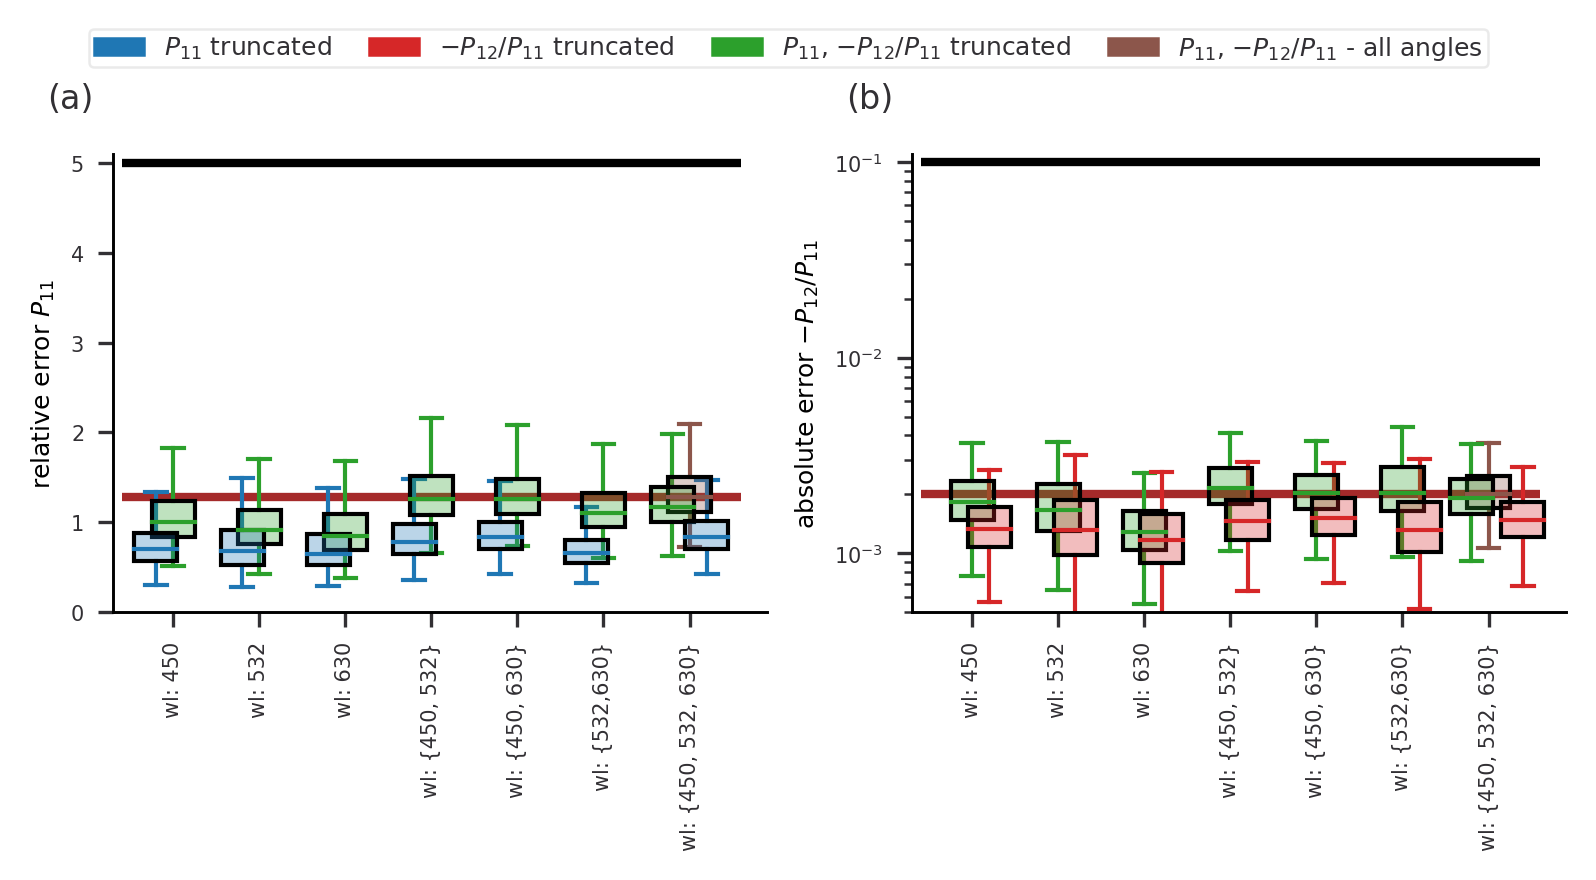

In [37]:
fig = plt.figure(figsize=(5.3,2.5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
k = 0
bplot1 = ax1.boxplot(df_P11_rel,showfliers = False,positions = position_k,patch_artist = True)
bplot2 = ax2.boxplot(df_P12,showfliers = False,positions = position_k,patch_artist = True)

for patch, color in zip(bplot1['boxes'],color_k):
    patch.set_facecolor(color)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
for patch, color in zip(bplot2['boxes'],color_k):
    patch.set_facecolor(color)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))   
for patch, color in zip(bplot1['whiskers'],color_k2):
    patch.set_color(color)
for patch, color in zip(bplot2['whiskers'],color_k2):
    patch.set_color(color)       
for patch, color in zip(bplot1['caps'],color_k2):
    patch.set_color(color)    
for patch, color in zip(bplot2['caps'],color_k2):
    patch.set_color(color)  
for patch, color in zip(bplot1['medians'],color_k):
    patch.set_color(color)
for patch, color in zip(bplot2['medians'],color_k):
    patch.set_color(color)      
    
    
xlabel = ('wl: 450', 'wl: 532','wl: 630','wl: {450, 532}','wl: {450, 630}','wl: {532,630}', 'wl: {450, 532, 630}')
x_pos = np.arange(len(xlabel))+1
ax1.set_xticks(x_pos)
ax1.set_xticklabels(xlabel, rotation='vertical')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(xlabel, rotation='vertical')
ax1.set_ylabel('relative error $P_{11}$')
ax1.tick_params(axis='both', which='major')
ax2.set_ylabel('absolute error $-P_{12}/P_{11}$')
ax2.tick_params(axis='both', which='major')   
ax1.hlines(df_P11_rel['1'].median(),0.4,7.6, colors='brown', linestyles='solid',linewidth = 2)
ax2.hlines(df_P12['1'].median(),0.4,7.6, colors='brown', linestyles='solid',linewidth = 2)

ax1.hlines(5,0.4,7.6, colors='black', linestyles='solid',linewidth = 2)
ax2.hlines(0.1,0.4,7.6, colors='black', linestyles='solid',linewidth = 2)

ax2.set_yscale('log')
ax2.set_ylim((0.0005, 0.11))
ax1.set_ylim((None, 5.1))

fig.tight_layout()


red_patch = mpatches.Patch(color = k_red, label ='$-P_{12}/P_{11}$ truncated')
green_patch = mpatches.Patch(color = k_green,label = '$P_{11}$, $-P_{12}/P_{11}$ truncated')
blue_patch = mpatches.Patch(color = k_blue, label ='$P_{11}$ truncated')
brown_patch = mpatches.Patch(color = k_brown, label ='$P_{11}$, $-P_{12}/P_{11}$ - all angles')

plt.legend(handles = [blue_patch, red_patch, green_patch, brown_patch], fontsize = 6,bbox_to_anchor=(0.9, 1.3),ncol = 4)

ax1.text(-0.1, 1.1,'(a)' , transform=ax1.transAxes, size=sizel)
ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)



fig.savefig(f'{directory1_new}/comparison_abs_error_bim_AAE_fw_labels.jpg',bbox_inches='tight')

In [40]:
def boxplot_func(bplot,colork,color2):
    for patch, color in zip(bplot['boxes'],colork):
        patch.set_facecolor(color)
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    for patch, color in zip(bplot['whiskers'],color2):
        patch.set_color(color)
    
    for patch, color in zip(bplot['caps'],color2):
        patch.set_color(color)    
  
    for patch, color in zip(bplot['medians'],colork):
        patch.set_color(color)


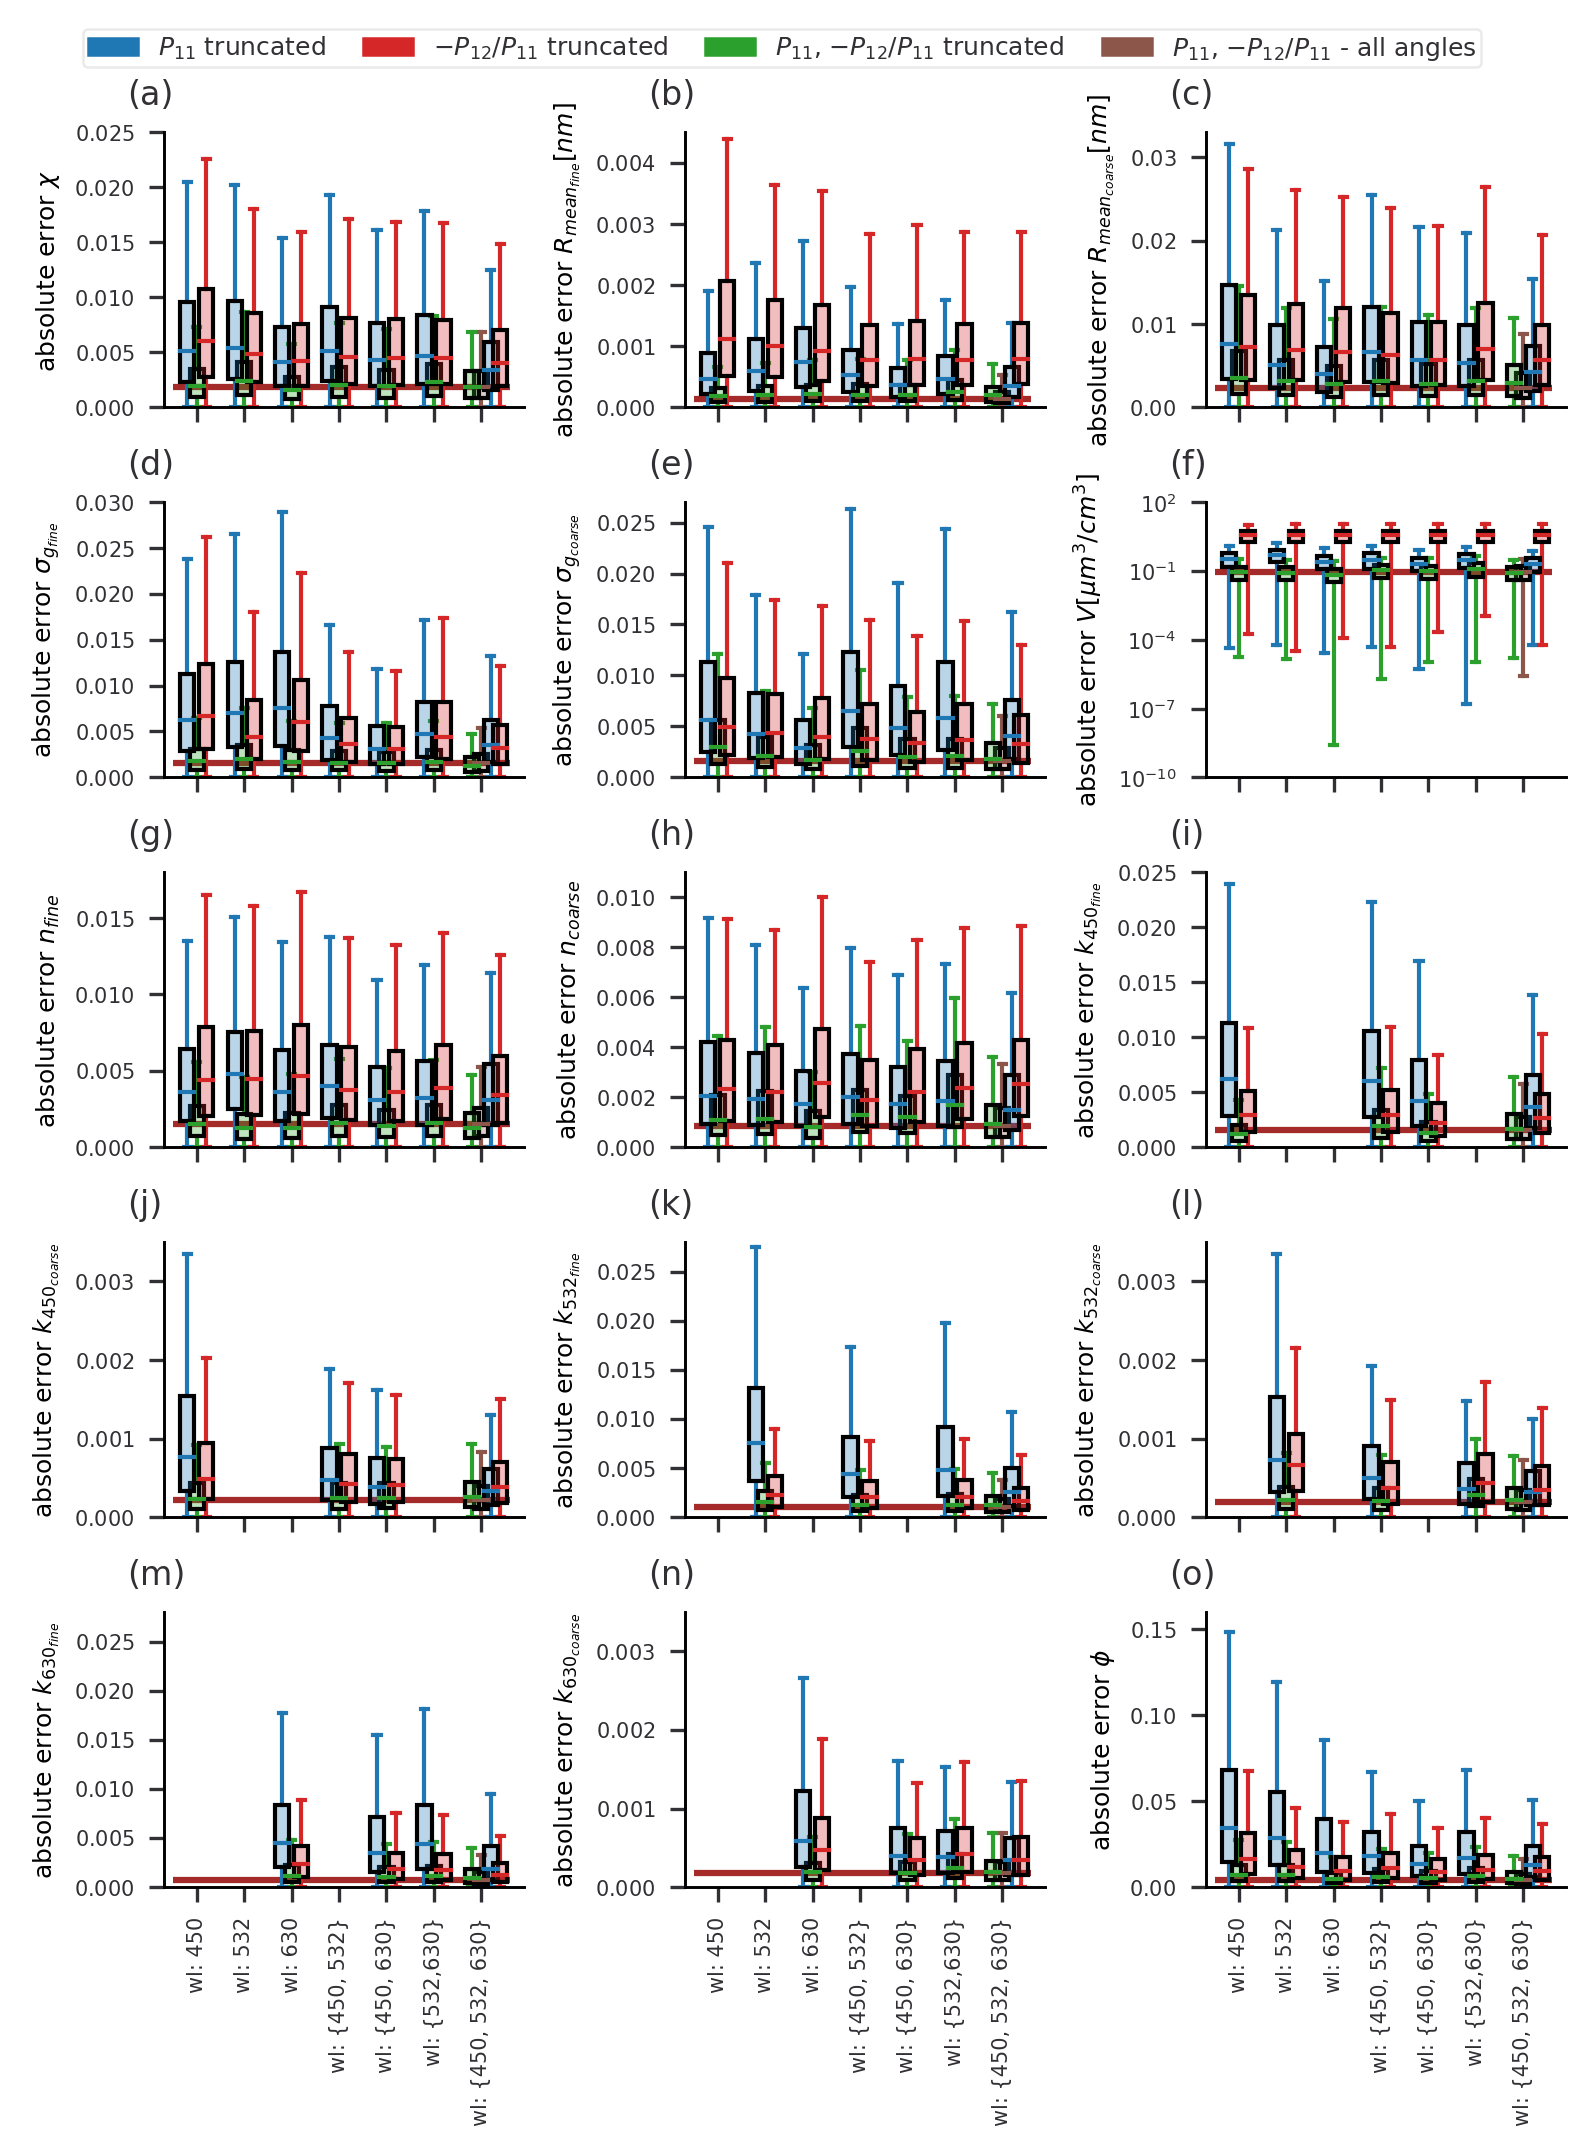

In [41]:
fig = plt.figure(figsize=(5.3,7))
#fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(5,3,1)
ax2 = fig.add_subplot(5,3,2)
ax3 = fig.add_subplot(5,3,3)
ax4 = fig.add_subplot(5,3,4,sharex=ax1)
ax5 = fig.add_subplot(5,3,5,sharex=ax2)
ax6 = fig.add_subplot(5,3,6,sharex=ax3)
ax7 = fig.add_subplot(5,3,7,sharex=ax1)
ax8 = fig.add_subplot(5,3,8,sharex=ax2)
ax9 = fig.add_subplot(5,3,9,sharex=ax3)
ax10 = fig.add_subplot(5,3,10,sharex=ax1)
ax11 = fig.add_subplot(5,3,11,sharex=ax2)
ax12 = fig.add_subplot(5,3,12,sharex=ax3)
ax13 = fig.add_subplot(5,3,13,sharex=ax1)
ax14 = fig.add_subplot(5,3,14,sharex=ax2)
ax15 = fig.add_subplot(5,3,15,sharex=ax3)


ax1.text(-0.1, 1.1,'(a)' , transform=ax1.transAxes, size=sizel)
ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)
ax3.text(-0.1, 1.1,'(c)' , transform=ax3.transAxes, size=sizel)
ax4.text(-0.1, 1.1,'(d)' , transform=ax4.transAxes, size=sizel)
ax5.text(-0.1, 1.1,'(e)' , transform=ax5.transAxes, size=sizel)
ax6.text(-0.1, 1.1,'(f)' , transform=ax6.transAxes, size=sizel)
ax7.text(-0.1, 1.1,'(g)' , transform=ax7.transAxes, size=sizel)
ax8.text(-0.1, 1.1,'(h)' , transform=ax8.transAxes, size=sizel)
ax9.text(-0.1, 1.1,'(i)' , transform=ax9.transAxes, size=sizel)
ax10.text(-0.1, 1.1,'(j)' , transform=ax10.transAxes, size=sizel)
ax11.text(-0.1, 1.1,'(k)' , transform=ax11.transAxes, size=sizel)
ax12.text(-0.1, 1.1,'(l)' , transform=ax12.transAxes, size=sizel)
ax13.text(-0.1, 1.1,'(m)' , transform=ax13.transAxes, size=sizel)
ax14.text(-0.1, 1.1,'(n)' , transform=ax14.transAxes, size=sizel)
ax15.text(-0.1, 1.1,'(o)' , transform=ax15.transAxes, size=sizel)



k = 0
bplot1 = ax1.boxplot(df_FMF,showfliers = False,positions = position_k,patch_artist = True,widths = 0.3)
bplot2 = ax2.boxplot(df_Rfine,showfliers = False,positions = position_k,patch_artist = True, widths = 0.3)
bplot3 = ax3.boxplot(df_Rcoarse,showfliers = False,positions = position_k,patch_artist = True, widths = 0.3)
bplot4 = ax4.boxplot(df_GSD_fine,showfliers = False,positions = position_k,patch_artist = True, widths = 0.3)
bplot5 = ax5.boxplot(df_GSD_coarse,showfliers = False,positions = position_k,patch_artist = True, widths = 0.3)
bplot6 = ax6.boxplot(df_V,showfliers = False,positions = position_k,patch_artist = True, widths = 0.3)

bplot7 = ax7.boxplot(df_n_fine,showfliers = False,positions = position_k,patch_artist = True,widths = 0.3)
bplot8 = ax8.boxplot(df_n_coarse,showfliers = False,positions = position_k,patch_artist = True,widths = 0.3)
bplot9 = ax9.boxplot(df_k_450_fine,showfliers = False,positions = position_k_450,patch_artist = True,widths = 0.3)
bplot10 = ax10.boxplot(df_k_450_coarse,showfliers = False,positions = position_k_450,patch_artist = True,widths = 0.3)
bplot11 = ax11.boxplot(df_k_532_fine,showfliers = False,positions = position_k_532,patch_artist = True,widths = 0.3)
bplot12 = ax12.boxplot(df_k_532_coarse,showfliers = False,positions = position_k_532,patch_artist = True,widths = 0.3)
bplot13 = ax13.boxplot(df_k_630_fine,showfliers = False,positions = position_k_630,patch_artist = True,widths = 0.3)
bplot14 = ax14.boxplot(df_k_630_coarse,showfliers = False,positions = position_k_630,patch_artist = True,widths = 0.3)
bplot15 = ax15.boxplot(df_sph,showfliers = False,positions = position_k,patch_artist = True,widths = 0.3)
   
    

ax6.set_yscale('log')

boxplot_func(bplot1,color_k,color_k2)
boxplot_func(bplot2,color_k,color_k2)
boxplot_func(bplot3,color_k,color_k2)
boxplot_func(bplot4,color_k,color_k2)
boxplot_func(bplot5,color_k,color_k2)
boxplot_func(bplot6,color_k,color_k2)
boxplot_func(bplot7,color_k,color_k2)
boxplot_func(bplot8,color_k,color_k2)
boxplot_func(bplot9,color_k_450,color_k2_450)
boxplot_func(bplot10,color_k_450,color_k2_450)
boxplot_func(bplot11,color_k_450,color_k2_450)
boxplot_func(bplot12,color_k_450,color_k2_450)
boxplot_func(bplot13,color_k_450,color_k2_450)
boxplot_func(bplot14,color_k_450,color_k2_450)
boxplot_func(bplot15,color_k,color_k2)

    
xlabel = ('wl: 450', 'wl: 532','wl: 630','wl: {450, 532}','wl: {450, 630}','wl: {532,630}', 'wl: {450, 532, 630}')
x_pos = np.arange(len(xlabel))+1
ax1.set_xticks(x_pos)
ax2.set_xticks(x_pos)
ax3.set_xticks(x_pos)
ax4.set_xticks(x_pos)
ax5.set_xticks(x_pos)
ax6.set_xticks(x_pos)
ax7.set_xticks(x_pos)
ax8.set_xticks(x_pos)
ax9.set_xticks(x_pos)
ax10.set_xticks(x_pos)
ax11.set_xticks(x_pos)
ax12.set_xticks(x_pos)
ax13.set_xticks(x_pos)
ax14.set_xticks(x_pos)
ax15.set_xticks(x_pos)

ax13.set_xticks(x_pos)
ax13.set_xticklabels(xlabel, rotation='vertical')
ax13.tick_params(axis='both', which='major')

ax14.set_xticks(x_pos)
ax14.set_xticklabels(xlabel, rotation='vertical')
ax14.tick_params(axis='both', which='major')   

ax15.set_xticks(x_pos)
ax15.set_xticklabels(xlabel, rotation='vertical')
ax15.tick_params(axis='both', which='major')


ax1.set_ylabel('absolute error $\chi$')
ax2.set_ylabel('absolute error $R_{mean_{fine}} [nm]$')
ax3.set_ylabel('absolute error $R_{mean_{coarse}} [nm]$')
ax4.set_ylabel('absolute error $\sigma_{g_{fine}}$')
ax5.set_ylabel('absolute error $\sigma_{g_{coarse}}$')
ax6.set_ylabel('absolute error $V [\mu m^3 / cm^3]$')
ax7.set_ylabel('absolute error $n_{fine}$')
ax8.set_ylabel('absolute error $n_{coarse}$')
ax9.set_ylabel('absolute error $k_{450_{fine}}$')
ax10.set_ylabel('absolute error $k_{450_{coarse}}$')
ax11.set_ylabel('absolute error $k_{532_{fine}}$')
ax12.set_ylabel('absolute error $k_{532_{coarse}}$')
ax13.set_ylabel('absolute error $k_{630_{fine}}$')
ax14.set_ylabel('absolute error $k_{630_{coarse}}$')
ax15.set_ylabel('absolute error $\phi$')




plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax12.get_xticklabels(), visible=False)




ax1.hlines(df_FMF['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax2.hlines(df_Rfine['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax3.hlines(df_Rcoarse['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax4.hlines(df_GSD_fine['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax5.hlines(df_GSD_coarse['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax6.hlines(df_V['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax7.hlines(df_n_fine['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax8.hlines(df_n_coarse['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax9.hlines(df_k_450_fine['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax10.hlines(df_k_450_coarse['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax11.hlines(df_k_532_fine['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax12.hlines(df_k_532_coarse['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax13.hlines(df_k_630_fine['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax14.hlines(df_k_630_coarse['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)
ax15.hlines(df_sph['1'].median(),0.5,7.6, colors='brown', linestyles='solid',linewidth = 1.5)



#ax2.set_yscale('log')

#ax3.set_yscale('log')

#ax7.set_yscale('log')

#ax8.set_yscale('log')

#ax12.set_yscale('log')

ax1.set_ylim((0, None))
ax2.set_ylim((0, 0.0045))
ax3.set_ylim((0, 0.033))
ax4.set_ylim((0, 0.03))
ax5.set_ylim((0, 0.027))
#ax6.set_ylim((0, None))
ax7.set_ylim((0, 0.018))
ax8.set_ylim((0, 0.011))
ax9.set_ylim((0, 0.025))
ax10.set_ylim((0, 0.0035))
ax11.set_ylim((0, 0.028))
ax12.set_ylim((0, 0.0035))
ax13.set_ylim((0, 0.028))
ax14.set_ylim((0, 0.0035))
ax15.set_ylim((0, 0.16))


red_patch = mpatches.Patch(color = k_red, label ='$-P_{12}/P_{11}$ truncated')
green_patch = mpatches.Patch(color = k_green,label = '$P_{11}$, $-P_{12}/P_{11}$ truncated')
blue_patch = mpatches.Patch(color = k_blue, label ='$P_{11}$ truncated')
brown_patch = mpatches.Patch(color = k_brown, label ='$P_{11}$, $-P_{12}/P_{11}$ - all angles')
fig.tight_layout()

plt.legend(handles = [blue_patch, red_patch, green_patch, brown_patch], fontsize = 6,bbox_to_anchor=(0.8, 6.8),ncol = 4)


fig.savefig(f'{directory1_new}/comparison_abs_error_bim_AAE_iv_labels.jpg',bbox_inches='tight')